In [76]:
import numpy as np
import scipy as sp 
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib notebook
G=5 #gravitationnal constant
epsilon=0.01 #prevent gravity to explose at short distance -> collision

In [77]:
nparticles = 2
dt = 0.1 #Timestep
buls = np.zeros((nparticles,5)) #array with every bullets (5 component each: mass, x, y, vx, vy)
for bul in buls: 
    bul[0]=np.random.rand()
    bul[1]=np.random.rand()
    bul[2]=np.random.rand()
    bul[3]=np.random.rand()*2-1
    bul[4]=np.random.rand()*2-1


In [78]:
def gravity(bul1,bul2):
    # gravitational force of bul2 on bul1 
    m1,x1,y1=bul1[0],bul1[1],bul1[2]
    m2,x2,y2=bul2[0],bul2[1],bul2[2]
    num = G*m1*m2
    den = ((x1-x2)**2+(y1-y2)**2+epsilon**2)**(3/2)
    return [-(num/den)*(x1-x2),-(num/den)*(y1-y2)]
    

In [79]:
def calForce(buls): #calculate force between 2 particles
    forces=np.zeros((nparticles,2))
    for i in range(nparticles):
        for j in range(nparticles):
            if (i!=j):
                forces[i]=gravity(buls[i],buls[j]) #here just the gravity
    return forces 

In [80]:
def takeStep(dt,buls):
    forces = calForce(buls)
    for i in range(len(buls)):
        ax,ay = forces[i]/buls[i,0] #Newton 2nd law
        buls[i,3] += ax*dt
        buls[i,4] += ay*dt
        buls[i,1] += (buls[i,3]*dt)
        buls[i,2] += (buls[i,4]*dt)
        buls[i,1] = buls[i,1]%1 #mod1 to fit in the screen
        buls[i,2] = buls[i,2]%1
        
    return buls
        

<IPython.core.display.Javascript object>


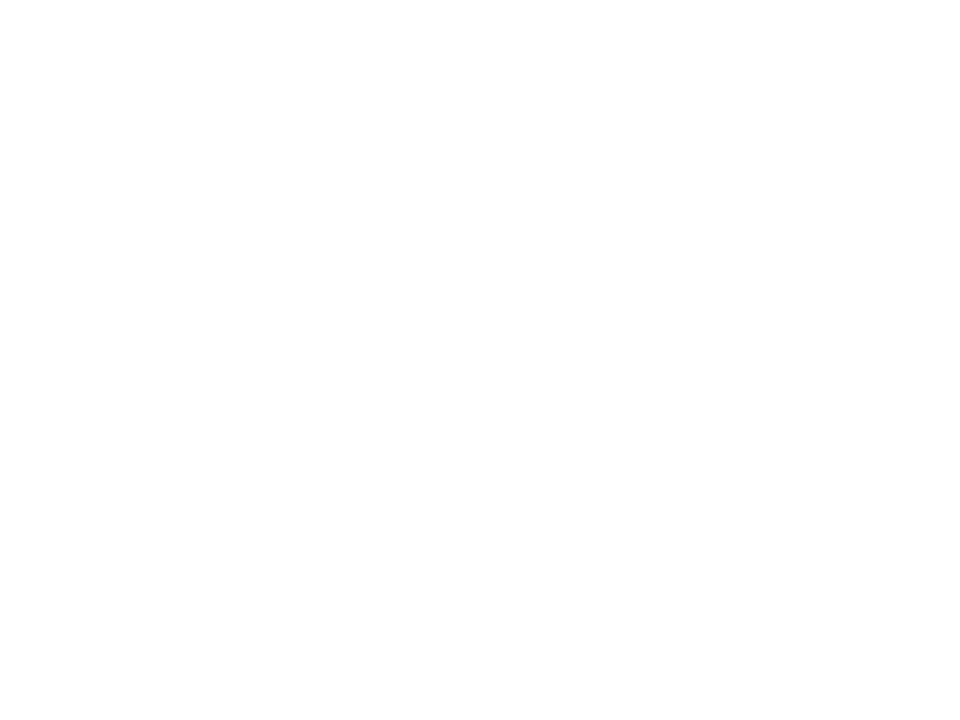

In [81]:
fig, ax = plt.subplots()
T=5
t=0
dt=0.001
x1=np.empty(0)
x2=np.empty(0)
y1=np.empty(0)
y2=np.empty(0)

while (t<T): #Simulate from 0 to T
    plt.close()
    buls = takeStep(dt,buls)
    x1=np.append(x1,buls[0,1])
    y1=np.append(y1,buls[0,2])
    x2=np.append(x2,buls[1,1])
    y2=np.append(y2,buls[1,2])
    
    t=t+dt

<IPython.core.display.Javascript object>


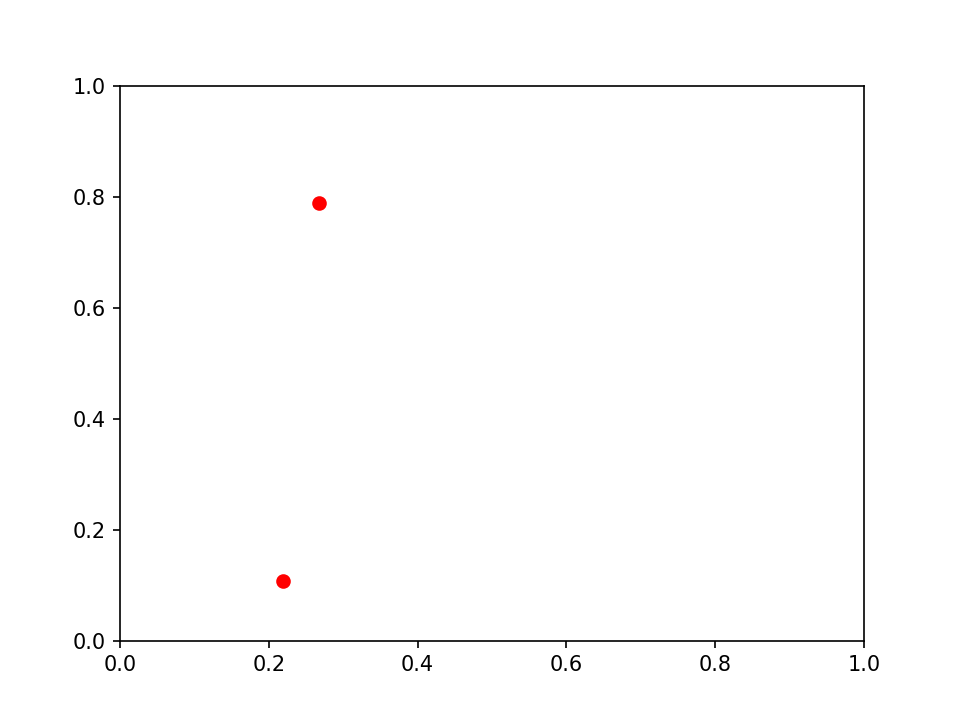

In [82]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [],'ro')

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return ln,

def update(index):
    ln.set_data((x1[index],x2[index]), (y1[index],y2[index]))
    
    return ln,

ani = animation.FuncAnimation(fig, update, frames=range(len(x1)),init_func=init, blit=True)
plt.show()

In [36]:
x1

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [37]:
y1

array([0.89738089, 0.43118619, 0.96500877, ..., 0.4409096 , 0.24667447,
       0.05250257])

In [38]:
x2

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [39]:
y2

array([0.99555007, 0.96904342, 0.85616321, ..., 0.35200534, 0.52763397,
       0.38716015])

array([[ 5.00000000e+03,  5.00000000e-01,  1.64225686e+01,
         0.00000000e+00,  3.12207227e+00],
       [ 1.00000000e+00,  5.00000000e-01, -7.96119432e+04,
         0.00000000e+00, -1.56103613e+04]])